# Pregunta 1
En este ejercicio, estimará los coeficientes de un modelo de regresión lineal utilizando el conjunto
de datos Boston. Tenga en cuenta que la variable objetivo es ‘crim‘, que representa la tasa de
criminalidad per cápita por ciudad. Considere los siguientes pasos:

a) Ajuste un modelo de Mínimos Cuadrados Ordinarios (OLS) y estime los coeficientes mediante el atributo coef . Hint: considere la biblioteca Scikit-Learn

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import requests
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
# Bias-Variance Decomposition
from mlxtend.evaluate import bias_variance_decomp

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import train_test_split

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import requests



In [19]:


# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv'

# Descargar el archivo CSV
response = requests.get(url)

# Guardar el archivo CSV en el disco local
with open('boston_house_prices.csv', 'wb') as f:
    f.write(response.content)

# Cargar el archivo CSV en un DataFrame de Pandas
import pandas as pd
boston = pd.read_csv('boston_house_prices.csv',header=1)

In [20]:
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


-crim - Crimen per cápita por ciudad

-zn - proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados (Que tan lleno esta un lote)

-indus - proporción de acres de negocios no minoristas por ciudad

-chas - variable ficticia de Charles River (= 1 si el tramo limita el río, 0 de lo contrario)

-nox - concentración de óxidos nítricos (partes por 10 millones)

-rm - número promedio de habitaciones por vivienda

-age - proporción de unidades ocupadas por sus propietarios construidas antes de 1940

-dis - Distancias desproporcionadas a cinco centros de empleo de Boston

-rad - índice de accesibilidad a las autopistas radiales

-tax - tasa de impuesto a la propiedad de valor completo por USD 10,000

-ptratio - colegios por localidad

-b 1000 (B - 0,63)^ 2, donde B es la proporción de negros por ciudad

-lstat - porcentaje de estado inferior de la población

-medv - valor mediano de las viviendas ocupadas por sus propietarios en USD 1000


In [21]:
boston = boston.dropna()

# Seleccionar la variable objetivo
y = boston['CRIM']

# Seleccionar las variables independientes
X = boston.drop('CRIM', axis=1)

x_scaled = scale(X)
y_scaled = scale(y)

In [22]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(x_scaled, y_scaled)

# Imprimir los coeficientes del modelo
print(model.coef_)

[ 0.1216216  -0.05092883 -0.02212108 -0.13894114  0.03513521  0.00475055
 -0.24166657  0.59543776 -0.07406496 -0.06822898 -0.08000138  0.10478155
 -0.21265747]


In [23]:
coefs_df = pd.DataFrame(data=model.coef_, columns=["Coefs - Attribute"], index=X.columns)
coefs_df

,Coefs - Attribute
ZN,0.121622
INDUS,-0.050929
CHAS,-0.022121
NOX,-0.138941
RM,0.035135
AGE,0.004751
DIS,-0.241667
RAD,0.595438
TAX,-0.074065
PTRATIO,-0.068229


b) Estime manualmente los coeficientes OLS y compárelos con los resultados obtenidos en el paso
anterior. Considere que los coeficientes se pueden estimar minimizando la Suma Residual de
Cuadrados (RSS). Hint: la Suma Residual de Cuadrados se define como:
RSS = (y − Xβ)′(y − Xβ)


In [24]:
Xtx = np.dot(x_scaled.T, x_scaled)
Xty = np.dot(x_scaled.T, y_scaled)
beta = np.linalg.solve(Xtx, Xty)
print(beta)

[ 0.1216216  -0.05092883 -0.02212108 -0.13894114  0.03513521  0.00475055
 -0.24166657  0.59543776 -0.07406496 -0.06822898 -0.08000138  0.10478155
 -0.21265747]


In [25]:
coefs_df['Coefs - Beta'] = beta
coefs_df

,Coefs - Attribute,Coefs - Beta
ZN,0.121622,0.121622
INDUS,-0.050929,-0.050929
CHAS,-0.022121,-0.022121
NOX,-0.138941,-0.138941
RM,0.035135,0.035135
AGE,0.004751,0.004751
DIS,-0.241667,-0.241667
RAD,0.595438,0.595438
TAX,-0.074065,-0.074065
PTRATIO,-0.068229,-0.068229


c) Estime los coeficientes OLS mediante el algoritmo de optimización de Descenso de Gradiente. Experimente con distintos valores para la Tasa de Aprendizaje (Learning Rate) y el
Umbral de Convergencia (Convergence Threshold). Compare los coeficientes obtenidos con
aquellos obtenidos en los pasos a) y b). ¿Qué valores de Tasa de Aprendizaje y Umbral de
Convergencia proporcionan resultados m´as cercanos a los obtenidos anteriormente?

In [26]:
# Initialize weights randomly
w0 = np.random.uniform(size=x_scaled.shape[1])

# Set the learning rate
alpha = 0.00001

tasas_aprendizaje = [0.00001, 0.0001]
umbrales_convergencia = [0.0000001, 0.00001, 0.01]

w1 = w0.copy()
results = {}

for learning_rate in tasas_aprendizaje:
  for convergence_threshold in umbrales_convergencia:
    while True:

        # Calculate predictions
        predictions = np.dot(x_scaled, w0)
        # Calculate errors
        errors = y_scaled - predictions
        # Calculate gradient (direction to adjust weights to minimize the loss function)
        gradient = -2 * np.dot(x_scaled.T, errors)
        # Update weights
        w1 = w0 - learning_rate * gradient
        print(f" w1 {w1} w0 {w0}")
        # Check for convergence
        if np.allclose(w1, w0, atol=convergence_threshold):
            results['aprendizaje-convergencia '+str(learning_rate)+' '+str(convergence_threshold)] = w1

            break

        # Prepare for the next iteration
        w0 = w1.copy()

# Print final weights
print(w1)



 w1 [0.7094516  0.73063746 0.39156829 0.15236598 0.78679344 0.53861327
 0.82416943 0.9689116  0.26798694 0.05671243 0.82974471 0.80424726
 0.16470221] w0 [0.71318996 0.7352624  0.39685728 0.15607603 0.79078988 0.5425911
 0.82413126 0.97464631 0.27402131 0.05740897 0.83410501 0.80649075
 0.16636173]
 w1 [0.70565819 0.72615265 0.3863452  0.14879916 0.78278558 0.5347615
 0.82408601 0.96332755 0.26210849 0.05607014 0.82534413 0.80209369
 0.1630003 ] w0 [0.7094516  0.73063746 0.39156829 0.15236598 0.78679344 0.53861327
 0.82416943 0.9689116  0.26798694 0.05671243 0.82974471 0.80424726
 0.16470221]
 w1 [0.70181519 0.72180021 0.38118716 0.14536781 0.77876996 0.53102877
 0.82388817 0.95788702 0.25637839 0.05547786 0.82090747 0.80002351
 0.16126109] w0 [0.70565819 0.72615265 0.3863452  0.14879916 0.78278558 0.5347615
 0.82408601 0.96332755 0.26210849 0.05607014 0.82534413 0.80209369
 0.1630003 ]
 w1 [0.6979277  0.71757284 0.37609333 0.14206462 0.77474998 0.52740846
 0.82358264 0.95258333 0.2507

In [27]:
results

{'aprendizaje-convergencia 1e-05 1e-07': array([ 0.12176387, -0.05046982, -0.02217134, -0.13899999,  0.03510915,
         0.00481463, -0.24163085,  0.59655229, -0.07539079, -0.06829312,
        -0.07996827,  0.10465968, -0.21280271]),
 'aprendizaje-convergencia 1e-05 1e-05': array([ 0.12176387, -0.05046982, -0.02217134, -0.13899999,  0.03510915,
         0.00481463, -0.24163085,  0.59655229, -0.07539079, -0.06829312,
        -0.07996827,  0.10465968, -0.21280271]),
 'aprendizaje-convergencia 1e-05 0.01': array([ 0.12176387, -0.05046982, -0.02217134, -0.13899999,  0.03510915,
         0.00481463, -0.24163085,  0.59655229, -0.07539079, -0.06829312,
        -0.07996827,  0.10465968, -0.21280271]),
 'aprendizaje-convergencia 0.0001 1e-07': array([ 0.12163806, -0.05088279, -0.02212548, -0.1389544 ,  0.03513319,
         0.00475789, -0.24167062,  0.59555114, -0.07419737, -0.06823808,
        -0.07999758,  0.10476499, -0.21267902]),
 'aprendizaje-convergencia 0.0001 1e-05': array([ 0.12163806

In [28]:
for llave in results.keys():
    coefs_df[llave] = results[llave]

In [29]:

coefs_df

,Coefs - Attribute,Coefs - Beta,aprendizaje-convergencia 1e-05 1e-07,aprendizaje-convergencia 1e-05 1e-05,aprendizaje-convergencia 1e-05 0.01,aprendizaje-convergencia 0.0001 1e-07,aprendizaje-convergencia 0.0001 1e-05,aprendizaje-convergencia 0.0001 0.01
ZN,0.121622,0.121622,0.121764,0.121764,0.121764,0.121638,0.121638,0.121638
INDUS,-0.050929,-0.050929,-0.050470,-0.050470,-0.050470,-0.050883,-0.050883,-0.050883
CHAS,-0.022121,-0.022121,-0.022171,-0.022171,-0.022171,-0.022125,-0.022125,-0.022125
NOX,-0.138941,-0.138941,-0.139000,-0.139000,-0.139000,-0.138954,-0.138954,-0.138954
RM,0.035135,0.035135,0.035109,0.035109,0.035109,0.035133,0.035133,0.035133
AGE,0.004751,0.004751,0.004815,0.004815,0.004815,0.004758,0.004758,0.004758
DIS,-0.241667,-0.241667,-0.241631,-0.241631,-0.241631,-0.241671,-0.241671,-0.241671
RAD,0.595438,0.595438,0.596552,0.596552,0.596552,0.595551,0.595551,0.595551
TAX,-0.074065,-0.074065,-0.075391,-0.075391,-0.075391,-0.074197,-0.074197,-0.074197
PTRATIO,-0.068229,-0.068229,-0.068293,-0.068293,-0.068293,-0.068238,-0.068238,-0.068238


2. 
El objetivo de este ejercicio es ilustrar c´omo el trade-off entre sesgo y varianza evoluciona con la
creciente complejidad de los modelos polin´omicos. Para este prop´osito, utilice el conjunto de datos
Portafolio. Considere los siguientes pasos:
a) Divisi´on del conjunto de datos: Separe los datos en un conjunto de entrenamiento y otro
de prueba, asignando el 20% de los datos al conjunto de prueba

In [5]:
# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/portafolio.csv'

# Descargar el archivo CSV
response = requests.get(url)

# Guardar el archivo CSV en el disco local
with open('portafolio.csv', 'wb') as f:
    f.write(response.content)

# Cargar el archivo CSV en un DataFrame de Pandas
import pandas as pd
portafolio = pd.read_csv('portafolio.csv',header=0)

In [6]:
portafolio.head()

,Unnamed: 0,X,Y
0,0,-0.895251,-0.234924
1,1,-1.562454,-0.885176
2,2,-0.417090,0.271888
3,3,1.044356,-0.734198
4,4,-0.315568,0.841983


In [8]:
portafolio.columns

Index(['Unnamed: 0', 'X', 'Y'], dtype='object')

In [33]:
y = portafolio['Y']
x = portafolio['X']
x_scaled = scale(x)
y_scaled = scale(y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)


In [14]:
X_train.shape

(80,)

In [17]:
X_test.shape

(20,)

2) Ajuste de modelos polinomicos: Implemente un bucle para ajustar modelos de regresion
polinomial desde grado 1 hasta grado 8. Hint: considere las funciones PolynomialFeatures
y LinearRegression de Scikit-Learn.

In [10]:
# URL del archivo CSV en GitHub
url = 'https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/portafolio.csv'

# Descargar el archivo CSV
response = requests.get(url)

# Guardar el archivo CSV en el disco local
with open('portafolio.csv', 'wb') as f:
    f.write(response.content)

# Cargar el archivo CSV en un DataFrame de Pandas
import pandas as pd
portafolio = pd.read_csv('portafolio.csv',header=0)

In [11]:
tot_obs = portafolio.shape[0]
idx = np.random.choice(tot_obs, size=int(0.8 * tot_obs), replace=False)
training_sample = portafolio.iloc[idx]
testing_sample = portafolio.drop(idx)
training_sample = portafolio.drop('Unnamed: 0', axis=1)
testing_sample  = portafolio.drop('Unnamed: 0', axis=1)

In [12]:
training_sample

,X,Y
0,-0.895251,-0.234924
1,-1.562454,-0.885176
2,-0.417090,0.271888
3,1.044356,-0.734198
4,-0.315568,0.841983
...,...,...
95,0.479091,1.454774
96,-0.535020,-0.399175
97,-0.773129,-0.957175
98,0.403634,1.396038


In [49]:
X = portafolio['X'].values.reshape(-1, 1)
y = portafolio['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

results = []

for grado in range(9):

    poly_features = PolynomialFeatures(degree=grado)
    #X_poly_train = poly_features.fit_transform(training_sample[['X']])
    #X_poly_test = poly_features.fit_transform(testing_sample[['X']])

    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.fit_transform(X_test)


    model = LinearRegression()
    
    #model.fit(X_poly_train, training_sample['Y'])
    model.fit(X_poly_train, y_train)


    X_train_mod = X_poly_train
    #y_train_mod = training_sample['Y'].values
    y_train_mod = y_train

    X_test_mod = X_poly_test
    #y_test_mod = testing_sample['Y'].values
    y_test_mod = y_test


c) Descomposición sesgo-varianza: Dentro del mismo bucle, calcule la descomposición de
sesgo-varianza para cada modelo, tanto en el conjunto de entrenamiento como en el de prueba.
Hint: considere la librería mlxtend.


In [48]:
X = portafolio['X'].values.reshape(-1, 1)
y = portafolio['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

results = []

for grado in range(9):

    poly_features = PolynomialFeatures(degree=grado)
    #X_poly_train = poly_features.fit_transform(training_sample[['X']])
    #X_poly_test = poly_features.fit_transform(testing_sample[['X']])

    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.fit_transform(X_test)


    model = LinearRegression()
    
    #model.fit(X_poly_train, training_sample['Y'])
    model.fit(X_poly_train, y_train)


    X_train_mod = X_poly_train
    #y_train_mod = training_sample['Y'].values
    y_train_mod = y_train

    X_test_mod = X_poly_test
    #y_test_mod = testing_sample['Y'].values
    y_test_mod = y_test

    mse_train, bias_train, var_train = bias_variance_decomp(
        model, X_train_mod, y_train_mod, X_train_mod, y_train_mod, loss='mse', num_rounds=10, random_seed=2
    )
    mse_test, bias_test, var_test = bias_variance_decomp(
        model, X_train_mod, y_train_mod, X_test_mod, y_test_mod, loss='mse', num_rounds=10, random_seed=2
    )
    results.append({"MSE_train": mse_train, "Bias_train": bias_train, "Variance_train": var_train,
                    "MSE_test": mse_test, "Bias_test": bias_test, "Variance_test": var_test,"grado": grado})

results_df = pd.DataFrame(results)
    

In [45]:
results_df

,MSE_train,Bias_train,Variance_train,MSE_test,Bias_test,Variance_test,grado
0,1.373724,1.354112,0.019612,1.084734,1.065122,0.019612,0
1,1.033470,1.011149,0.022321,0.745090,0.721000,0.024090,1
2,1.017788,0.994088,0.023700,0.812318,0.787047,0.025271,2
3,0.998591,0.968578,0.030013,0.813547,0.784339,0.029208,3
4,1.127227,0.987828,0.139399,0.800446,0.739927,0.060519,4
5,1.196343,0.997041,0.199302,0.764208,0.681494,0.082714,5
6,2.825022,1.449616,1.375406,0.900412,0.800768,0.099643,6
7,2.378716,0.997805,1.380911,1.091148,0.889242,0.201907,7
8,15.076262,1.765126,13.311136,1.310818,0.969330,0.341488,8


d) Visualizaci´on: Grafique c´omo sesgo, varianza y error cuadr´atico medio (MSE) var´ıan con la
complejidad del modelo (grados polin´omicos) para ambos conjuntos, entrenamiento y prueba

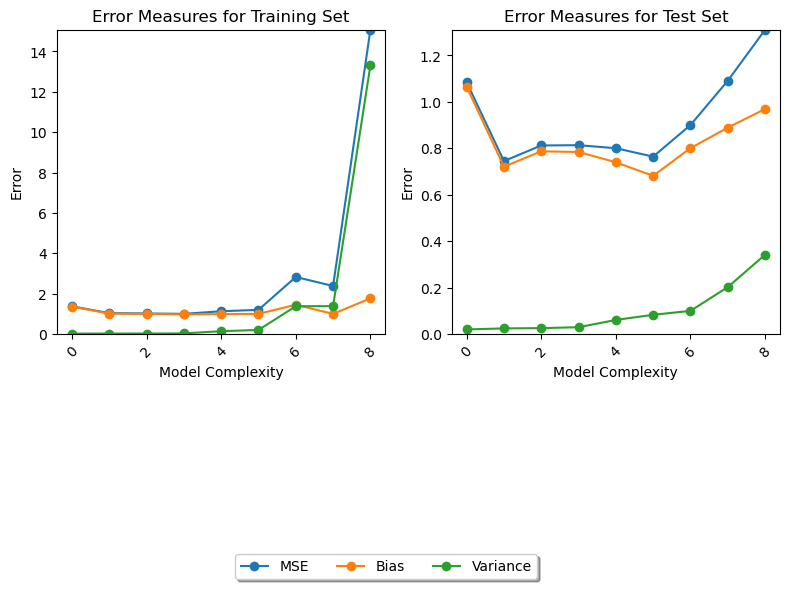

In [46]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot metrics for training set
ax1.plot(results_df['grado'], results_df['MSE_train'], marker='o', label='MSE')
ax1.plot(results_df['grado'], results_df['Bias_train'], marker='o', label='Bias')
ax1.plot(results_df['grado'], results_df['Variance_train'], marker='o', label='Variance')
ax1.set_title('Error Measures for Training Set')
ax1.set_xlabel('Model Complexity')
ax1.set_ylabel('Error')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, max(results_df[['MSE_train', 'Bias_train', 'Variance_train']].max()))

# Plot metrics for test set
ax2.plot(results_df['grado'], results_df['MSE_test'], marker='o', label='MSE')
ax2.plot(results_df['grado'], results_df['Bias_test'], marker='o', label='Bias')
ax2.plot(results_df['grado'], results_df['Variance_test'], marker='o', label='Variance')
ax2.set_title('Error Measures for Test Set')
ax2.set_xlabel('Model Complexity')
ax2.set_ylabel('Error')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, max(results_df[['MSE_test', 'Bias_test', 'Variance_test']].max()))

# Adjust and show the plot
plt.tight_layout()
handles, labels = ax1.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper center', bbox_to_anchor=(-0.2, -0.70), shadow=True, ncol=len(labels))

plt.show()

## Pregunta 3
Sobre k-fold Cross-Validation:
a) Explique cómo se implementa el enfoque k-fold Cross-Validation.
b) Detalle cuáles son las ventajas y desventajas del enfoque k-fold Cross-Validation con respecto
a:
I. El enfoque del Conjunto de Validación.
II. El enfoque de Validaci´on Cruzada Dejando Uno Afuera (LOOCV)

Implementación

K-Fold Cross-Validation (K-CV) es una técnica de validación cruzada común para evaluar modelos de aprendizaje automático. Divide aleatoriamente el conjunto de datos en k subconjuntos (folds) iguales. El proceso de evaluación se realiza de la siguiente manera:

1. División de datos:

Se divide el conjunto de datos en k folds aleatorios.
El tamaño de cada fold es aproximadamente igual (con algunas excepciones en el último fold para conjuntos de datos impares).


2. Entrenamiento y evaluación:

Se realiza un ciclo k veces:
k-1 folds se utilizan como conjunto de entrenamiento.
El fold restante se utiliza como conjunto de prueba.
Se entrena el modelo en el conjunto de entrenamiento.
Se evalúa el rendimiento del modelo en el conjunto de prueba.
Se registra la métrica de evaluación (por ejemplo, MSE, precisión).


3. Cálculo de la métrica promedio:

Se calcula la métrica de evaluación promedio para todas las k iteraciones.
Esta métrica promedio se considera una estimación del rendimiento del modelo en datos no vistos (generalización).

Respecto al conjunto de validación

I. Comparación con el enfoque del Conjunto de Validación:

Ventajas:

Mayor eficiencia: Utiliza todo el conjunto de datos para el entrenamiento en cada iteración.

Menor varianza: Promedia las métricas de evaluación de múltiples folds, lo que reduce la variabilidad aleatoria.

Más robusto a outliers: Si un fold contiene outliers, su impacto en la evaluación general se reduce al promediar con otros folds.

Desventajas:

Es computacionalmente más costoso, ya que requiere entrenar y evaluar el modelo k veces

Mayor sesgo: Cada fold se utiliza solo una vez para la prueba, lo que puede introducir un pequeño sesgo.

Menos flexible: No permite ajustar el tamaño del conjunto de validación.

Respecto al LOOCV

Ventajas

La validación cruzada k-fold es computacionalmente menos costosa que LOOCV, especialmente para conjuntos de datos grandes



Desventajas

Puede tener un sesgo mayor que LOOCV si el número de pliegues k es pequeño

K-CV es menos robusto a outliers que LOOCV.

Cuando el numero de datos es mejor el LOOCV


Pregunta 4
A continuaci´on implementar´a Cross-Validation para un conjunto de datos simulado. Considere los
siguientes pasos:


a) Genere el conjunto de datos simulado de la siguiente manera:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x^2 + rng.normal(size=100)
En este conjunto de datos, ¿cu´al es n (n´umero de observaciones) y cu´al es p (n´umero de variables predictoras)? Escriba el modelo utilizado para generar los datos en forma de ecuaci´on


In [56]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x-2*x**2 + rng.normal(size=100)

In [58]:
y.shape

(100,)

In [59]:
x.shape

(100,)

El número de observaciones es: 100 (n)
El número de variables predictoras es 1 (p)

b) Establezca una semilla aleatoria y luego calcule los errores LOOCV que resultan de ajustar
los siguientes cuatro modelos polinomiales usando m´ınimos cuadrados:
i. Y = β0 + β1X + ε

In [61]:
# Basic
import numpy as np
import pandas as pd
from functools import partial

# Scikit-Learn
from sklearn.model_selection import \
    (cross_validate,
     train_test_split,
     KFold,
     ShuffleSplit)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone

# Statsmodels
import statsmodels.api as sm

# Matplotlib
import matplotlib.pyplot as plt

In [114]:
ng = np.random.default_rng(1) 

x = rng.normal(size=100)

cv_error = np.zeros(4)

M = LinearRegression()

Y = x+ rng.normal(size=100)

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(x.reshape(-1, 1))
M_CV = cross_validate(M, X_poly, Y, cv = x.shape[0], scoring = 'neg_mean_squared_error')
cv_error[0] = abs(np.mean(M_CV['test_score']))

########################
Y = x + x**2 + rng.normal(size=100)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x.reshape(-1, 1))
M_CV = cross_validate(M, X_poly, Y, cv = x.shape[0], scoring = 'neg_mean_squared_error')
cv_error[1] = abs(np.mean(M_CV['test_score']))

#####################################
Y = x + x**2 + x**3 + rng.normal(size=100)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(x.reshape(-1, 1))
M_CV = cross_validate(M, X_poly, Y, cv = x.shape[0], scoring = 'neg_mean_squared_error')
cv_error[2] = abs(np.mean(M_CV['test_score']))

#######################################
Y = x + x**2 + x**3 + x**4 + rng.normal(size=100)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x.reshape(-1, 1))
M_CV = cross_validate(M, X_poly, Y, cv = x.shape[0], scoring = 'neg_mean_squared_error')
cv_error[3] = abs(np.mean(M_CV['test_score']))




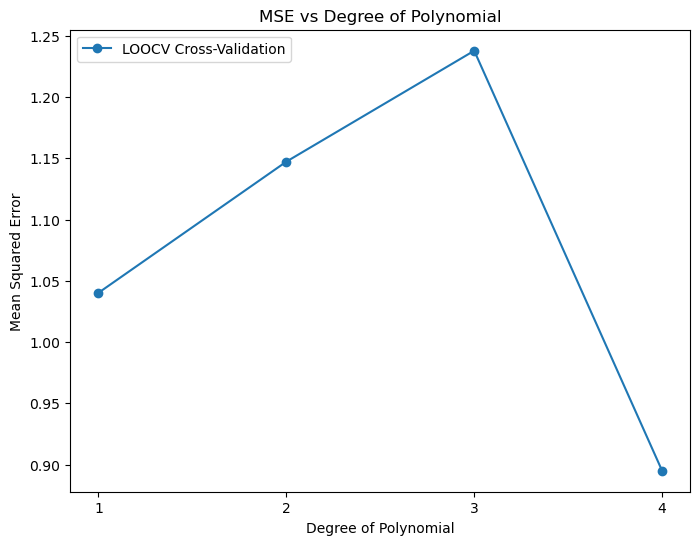

In [115]:
degrees = np.arange(1, 5)

plt.figure(figsize=(8, 6))
plt.plot(degrees, cv_error, label='LOOCV Cross-Validation', marker='o')

plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Degree of Polynomial")
plt.xticks(degrees)
plt.legend()
plt.show()

In [99]:
degrees

array([0, 1, 2, 3, 4])

In [101]:
ng = np.random.default_rng(5) 

x = rng.normal(size=100)

cv_error1 = np.zeros(4)

M = LinearRegression()

Y = x+ rng.normal(size=100)

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(x.reshape(-1, 1))
M_CV = cross_validate(M, X_poly, Y, cv = x.shape[0], scoring = 'neg_mean_squared_error')
cv_error1[0] = abs(np.mean(M_CV['test_score']))

Y = x + x**2 + rng.normal(size=100)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x.reshape(-1, 1))
M_CV = cross_validate(M, X_poly, Y, cv = x.shape[0], scoring = 'neg_mean_squared_error')
cv_error1[1] = abs(np.mean(M_CV['test_score']))

Y = x + x**2 + x**3 + rng.normal(size=100)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(x.reshape(-1, 1))
M_CV = cross_validate(M, X_poly, Y, cv = x.shape[0], scoring = 'neg_mean_squared_error')
cv_error1[2] = abs(np.mean(M_CV['test_score']))

Y = x + x**2 + x**3 + x**4 + rng.normal(size=100)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x.reshape(-1, 1))
M_CV = cross_validate(M, X_poly, Y, cv = x.shape[0], scoring = 'neg_mean_squared_error')
cv_error1[3] = abs(np.mean(M_CV['test_score']))

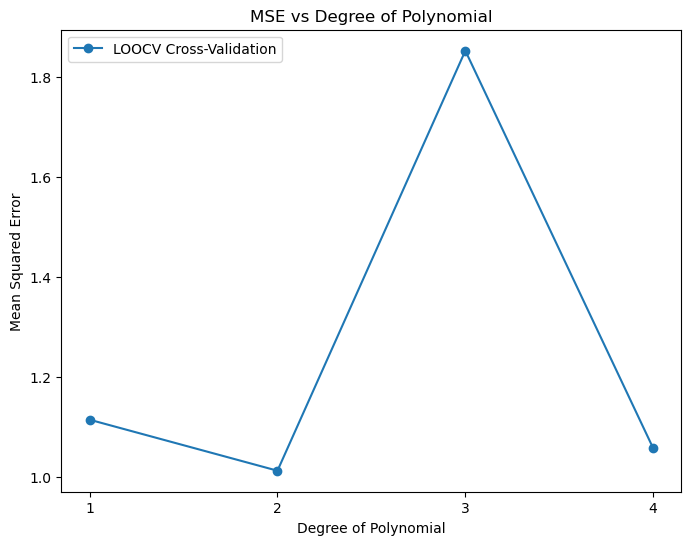

In [103]:
degrees = np.arange(1, 5)

plt.figure(figsize=(8, 6))
plt.plot(degrees, cv_error1, label='LOOCV Cross-Validation', marker='o')

   
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Degree of Polynomial")
plt.xticks(degrees)
plt.legend()
plt.show()

In [104]:
data = {
    "Degree of Polynomial": degrees,  # Suponiendo que "degrees" contiene los grados de los polinomios
    "LOOCV Error": cv_error,  # Suponiendo que "cv_error1" contiene los valores de MSE del primer modelo
    "LOOCV Error1": cv_error1,  # Suponiendo que "cv_error2" contiene los valores de MSE del segundo modelo
}
dMSE = pd.DataFrame(data)

In [105]:
dMSE

,Degree of Polynomial,LOOCV Error,LOOCV Error1
0,1,0.999137,1.113997
1,2,1.163876,1.011769
2,3,1.011727,1.853357
3,4,0.910899,1.056724


Los resultados son diferentes.
La semilla aleatoria determina la generación de diferentes valores de X por lo tanto de Y, es decir esto dara lugar a diferentes modelos con diferentes MSE en los LOOCV. Por otro lado, las semillas aleatorias garantizan la reproducibilidad de los resultados. Si usamos la misma semilla, el proceso de LOOCV (división en folds) será idéntico, y los errores resultantes, iguales.

d) ¿Cu´al de los modelos en c) tuvo el error LOOCV m´as peque˜no? ¿Esperaba ese resultado?
Explique su respuesta.

El menor error LOOCV los tuvo el polinimonio de grado 4, el de mayor grado. Se puede esperar debido al sobre ajuste que se realiza.